#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import confusion_matrix,r2_score,silhouette_score,accuracy_score
import pyttsx3
import pickle
plt.style.use('dark_background')

In [2]:
# Load your dataset
data = pd.read_csv('Salaries.csv')
data


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [3]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
data.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [6]:
data.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109489
OvertimePay          65998
OtherPay             83225
Benefits             98465
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   0
dtype: int64

In [7]:
data = data.drop(['Notes','Status','Agency','EmployeeName'],axis = 1)
data

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,4,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148649,148650,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014
148650,148651,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014
148651,148652,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014
148652,148653,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014


In [8]:
data.nunique()

Id                  148654
JobTitle              2159
BasePay             109489
OvertimePay          65998
OtherPay             83225
Benefits             98465
TotalPay            138486
TotalPayBenefits    142098
Year                     4
dtype: int64

In [9]:
data.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [10]:
work_year = []
for i in data['Year']:
    work_year.append(i)
print(work_year)

[2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 201

In [11]:
unique = []
for i in work_year:
    if i not in unique:
        unique.append(i)
print(unique)

[2011, 2012, 2013, 2014]


<Axes: xlabel='Year', ylabel='TotalPay'>

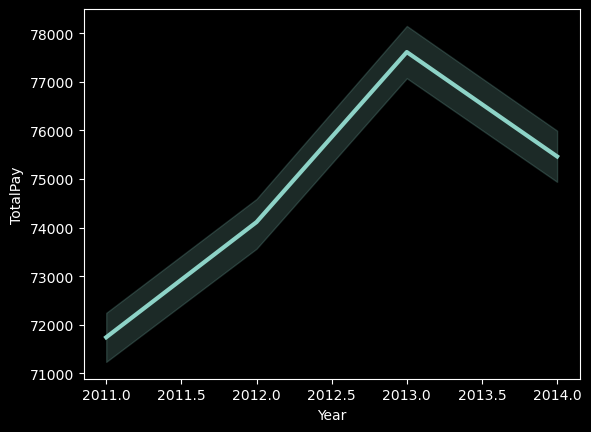

In [12]:
sns.lineplot(x =data['Year'] , y = data['TotalPay'],data=data , linewidth = 3)

(array([36159.,     0.,     0., 36766.,     0.,     0., 37606.,     0.,
            0., 38123.]),
 array([2011. , 2011.3, 2011.6, 2011.9, 2012.2, 2012.5, 2012.8, 2013.1,
        2013.4, 2013.7, 2014. ]),
 <BarContainer object of 10 artists>)

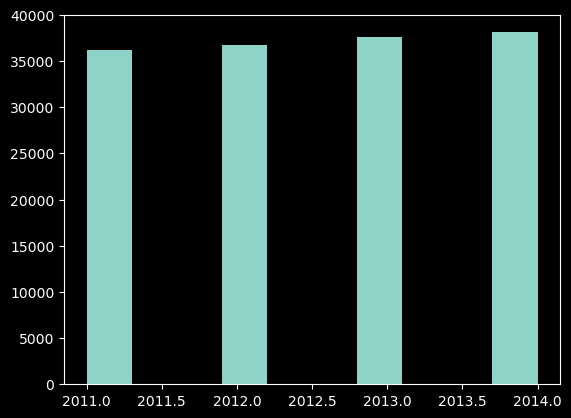

In [13]:
plt.hist(data['Year'])

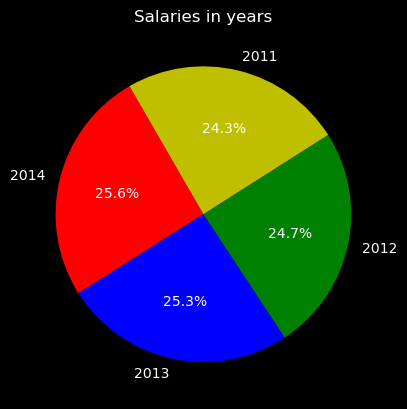

In [14]:
Years_values = data['Year'].value_counts()
plt.pie(Years_values, labels=Years_values.index,startangle = 120 , autopct='%1.1f%%' , colors = ["red","blue","Green","y"])
plt.title('Salaries in years')
plt.show()

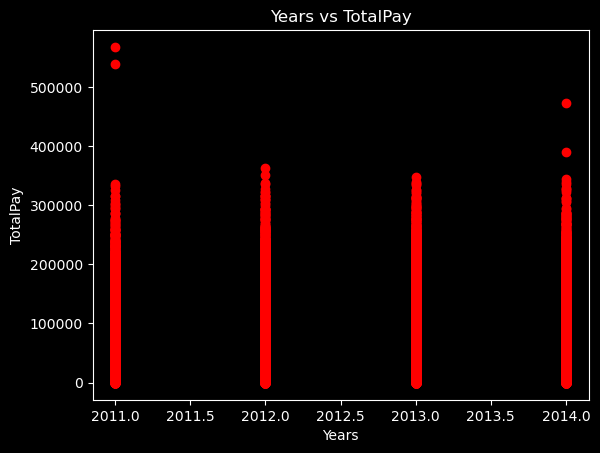

In [15]:
plt.scatter(data['Year'], data['TotalPay'], color='red')
plt.title('Years vs TotalPay')
plt.xlabel('Years')
plt.ylabel('TotalPay')
plt.show()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_11476\2518081161.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


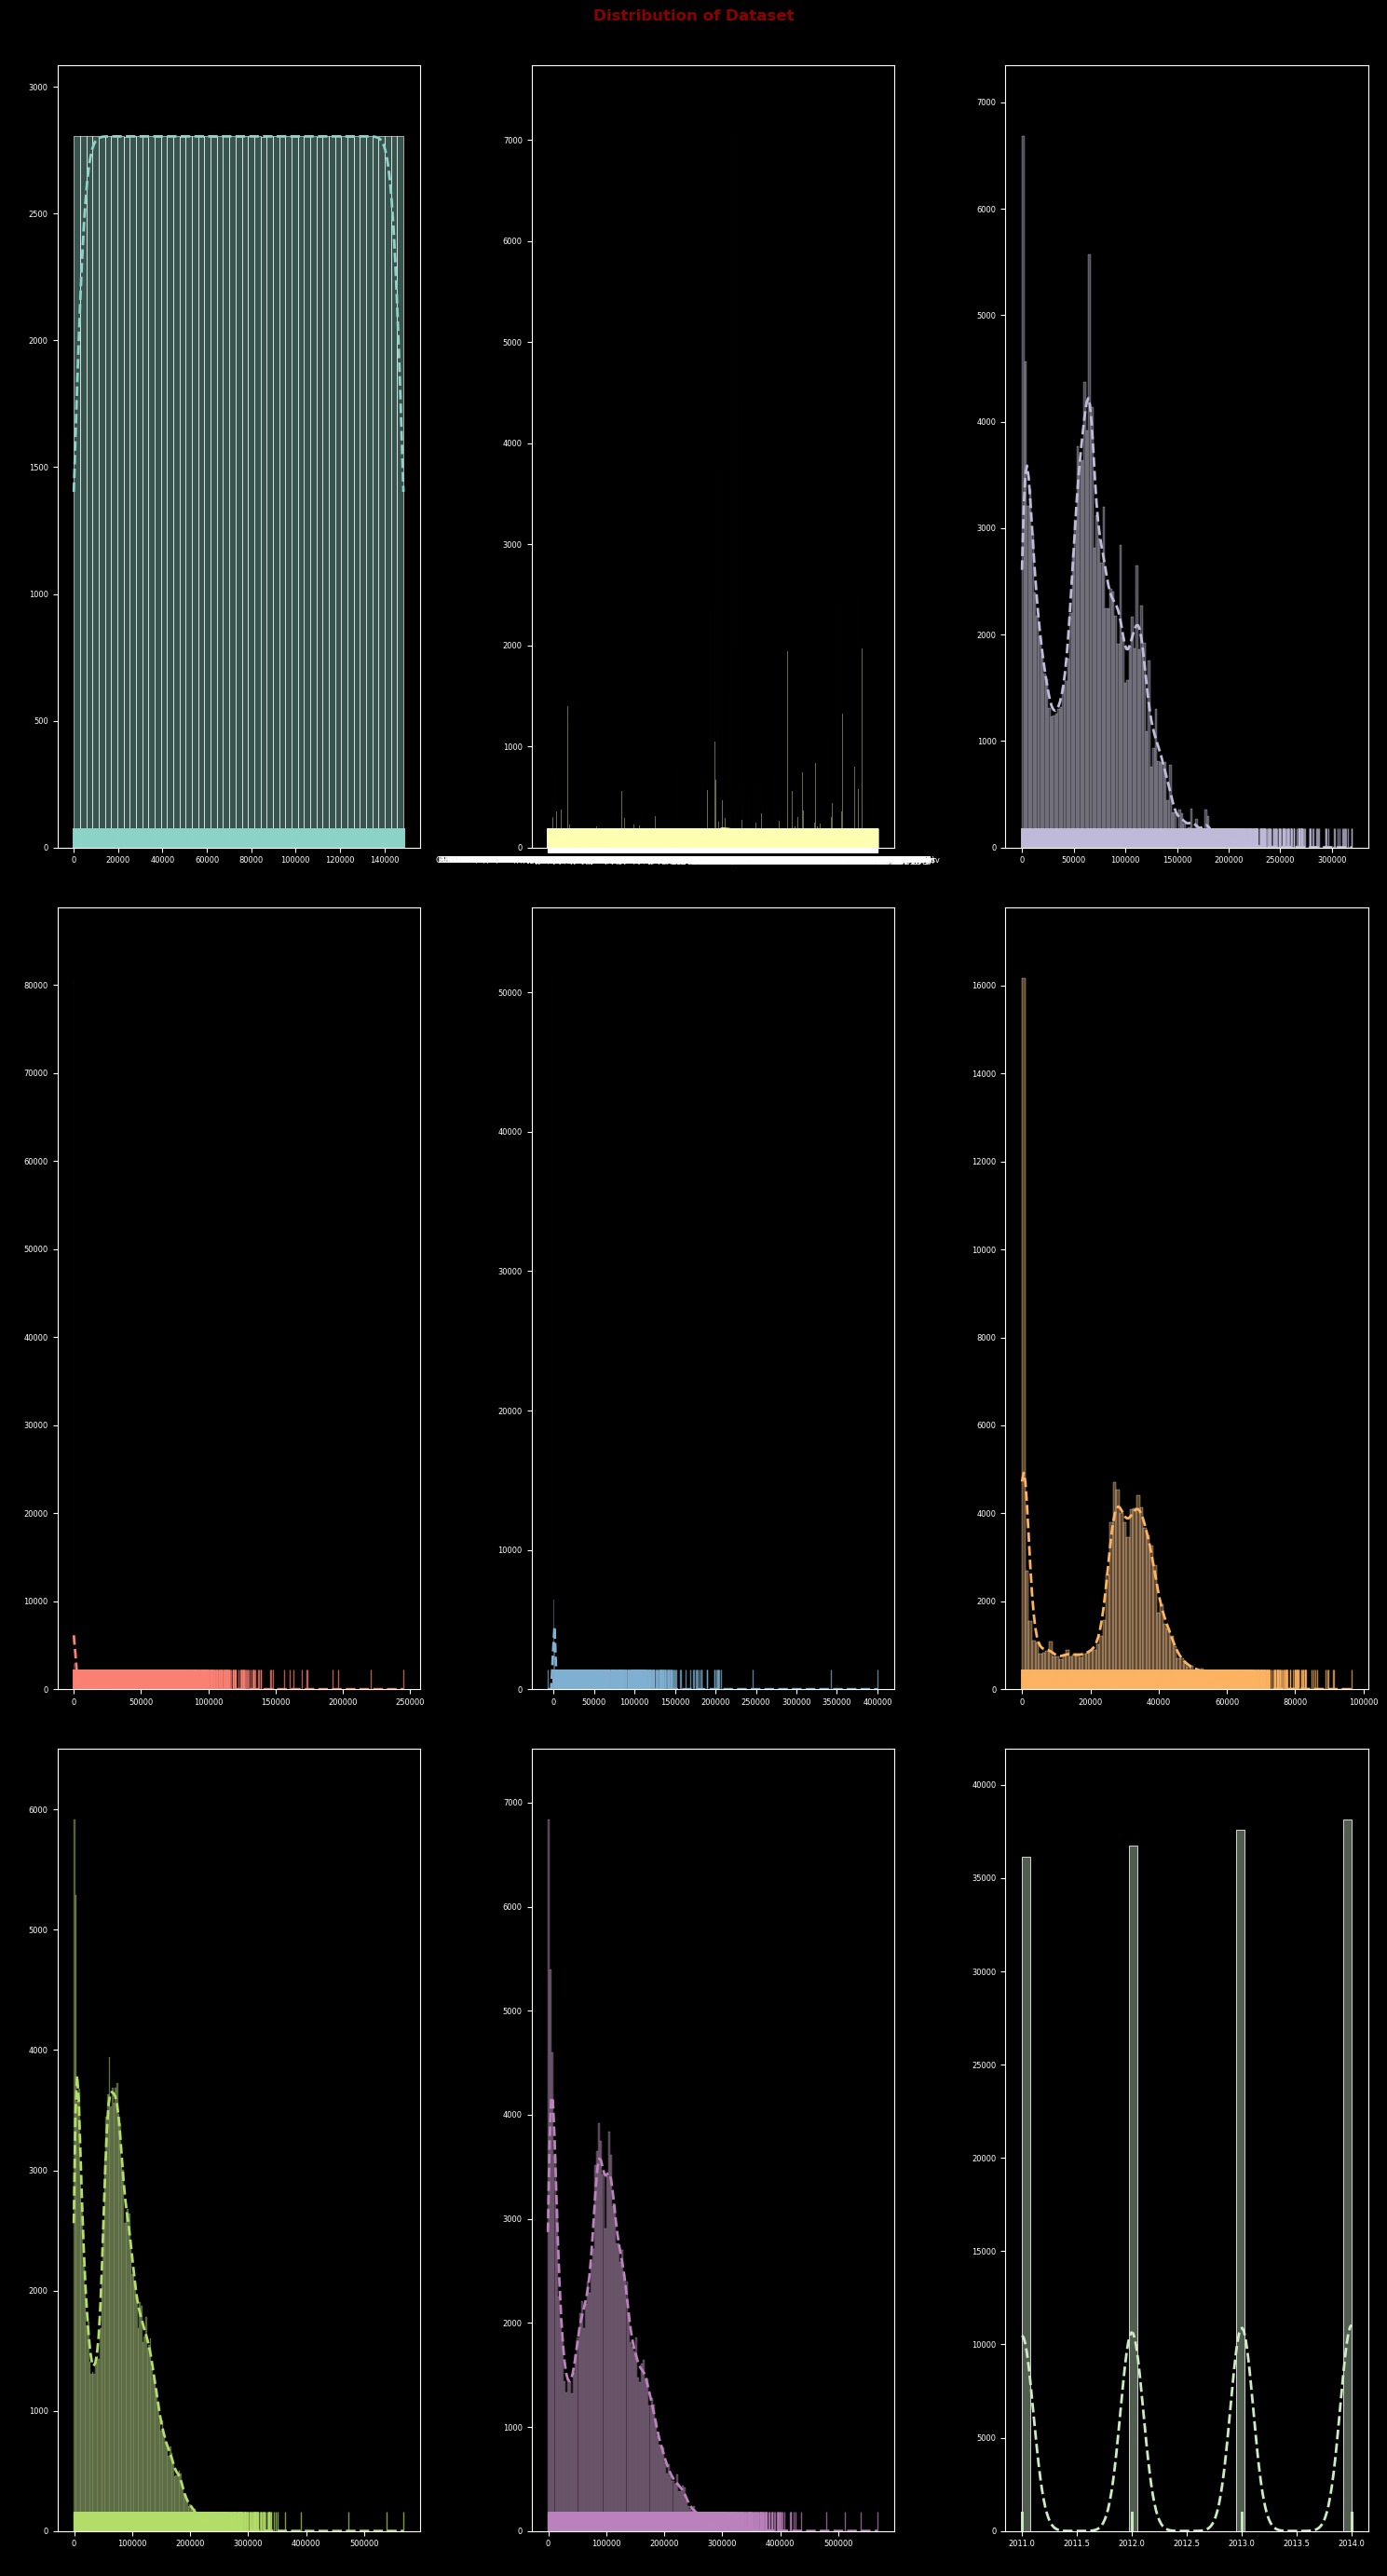

In [16]:
# Creating Subplots
fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 30))
axes = axes.flat

color_cycle = list(plt.rcParams['axes.prop_cycle'])
num_colors = len(color_cycle)

for i, num_col in enumerate(data):
    sns.histplot(data,
               x = num_col,
               stat = 'count',
               kde = True,
               color = color_cycle[i % num_colors]["color"],
               line_kws = {'linewidth': 2,
                           'linestyle':'dashed'},
               alpha = 0.4,
               ax = axes[i])
    sns.rugplot(data,
              x = num_col,
              color = color_cycle[i % num_colors]["color"],
              ax = axes[i], alpha = 0.7)
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
    axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
    axes[i].tick_params(labelsize = 6)

fig.suptitle('Distribution of Dataset', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 0.92)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

In [17]:
objects = data.select_dtypes(include=['object'])
objects

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT)
3,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
...,...
148649,Custodian
148650,Not provided
148651,Not provided
148652,Not provided


# Encoding Data

In [18]:
LE = LabelEncoder()
data['JobTitle'] = LE.fit_transform(data['JobTitle'])
data

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,831,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,2,293,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,293,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,4,2125,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,5,576,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148649,148650,562,0.00,0.00,0.00,0.0,0.00,0.00,2014
148650,148651,1274,NaN,NaN,NaN,NaN,0.00,0.00,2014
148651,148652,1274,NaN,NaN,NaN,NaN,0.00,0.00,2014
148652,148653,1274,NaN,NaN,NaN,NaN,0.00,0.00,2014


In [19]:
data.describe()

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,1243.297469,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42912.857795,568.259197,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,1.000000,0.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,794.000000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,74327.500000,1365.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,111490.750000,1703.000000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,148654.000000,2158.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   JobTitle          148654 non-null  int32  
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148650 non-null  float64
 4   OtherPay          148650 non-null  float64
 5   Benefits          112491 non-null  float64
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
dtypes: float64(6), int32(1), int64(2)
memory usage: 9.6 MB


In [21]:
data.isna().sum()

Id                      0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [22]:
y = data['TotalPay'].values
y

array([567595.43, 538909.28, 335279.91, ...,      0.  ,      0.  ,
         -618.13])

In [23]:
x = data.drop(["TotalPay"],axis = 1).values
x

array([[ 1.0000000e+00,  8.3100000e+02,  1.6741118e+05, ...,
                   nan,  5.6759543e+05,  2.0110000e+03],
       [ 2.0000000e+00,  2.9300000e+02,  1.5596602e+05, ...,
                   nan,  5.3890928e+05,  2.0110000e+03],
       [ 3.0000000e+00,  2.9300000e+02,  2.1273913e+05, ...,
                   nan,  3.3527991e+05,  2.0110000e+03],
       ...,
       [ 1.4865200e+05,  1.2740000e+03,            nan, ...,
                   nan,  0.0000000e+00,  2.0140000e+03],
       [ 1.4865300e+05,  1.2740000e+03,            nan, ...,
                   nan,  0.0000000e+00,  2.0140000e+03],
       [ 1.4865400e+05,  5.2300000e+02,  0.0000000e+00, ...,
         0.0000000e+00, -6.1813000e+02,  2.0140000e+03]])

# Solve problems of missing values

In [24]:
imputer = SimpleImputer (missing_values = np.NaN , strategy = 'mean')
imputer = imputer.fit(x[:,2:6])
x[:,2:6] = imputer.transform(x[:,2:6])

In [25]:
x

array([[ 1.00000000e+00,  8.31000000e+02,  1.67411180e+05, ...,
         2.50078932e+04,  5.67595430e+05,  2.01100000e+03],
       [ 2.00000000e+00,  2.93000000e+02,  1.55966020e+05, ...,
         2.50078932e+04,  5.38909280e+05,  2.01100000e+03],
       [ 3.00000000e+00,  2.93000000e+02,  2.12739130e+05, ...,
         2.50078932e+04,  3.35279910e+05,  2.01100000e+03],
       ...,
       [ 1.48652000e+05,  1.27400000e+03,  6.63254488e+04, ...,
         2.50078932e+04,  0.00000000e+00,  2.01400000e+03],
       [ 1.48653000e+05,  1.27400000e+03,  6.63254488e+04, ...,
         2.50078932e+04,  0.00000000e+00,  2.01400000e+03],
       [ 1.48654000e+05,  5.23000000e+02,  0.00000000e+00, ...,
         0.00000000e+00, -6.18130000e+02,  2.01400000e+03]])

In [26]:
df_x = pd.DataFrame(x , columns=['Id','JobTitle','BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits','Year'] )
df_x

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
0,1.0,831.0,167411.18000,0.000000,400184.250000,25007.893151,567595.43,2011.0
1,2.0,293.0,155966.02000,245131.880000,137811.380000,25007.893151,538909.28,2011.0
2,3.0,293.0,212739.13000,106088.180000,16452.600000,25007.893151,335279.91,2011.0
3,4.0,2125.0,77916.00000,56120.710000,198306.900000,25007.893151,332343.61,2011.0
4,5.0,576.0,134401.60000,9737.000000,182234.590000,25007.893151,326373.19,2011.0
...,...,...,...,...,...,...,...,...
148649,148650.0,562.0,0.00000,0.000000,0.000000,0.000000,0.00,2014.0
148650,148651.0,1274.0,66325.44884,5066.059886,3648.767297,25007.893151,0.00,2014.0
148651,148652.0,1274.0,66325.44884,5066.059886,3648.767297,25007.893151,0.00,2014.0
148652,148653.0,1274.0,66325.44884,5066.059886,3648.767297,25007.893151,0.00,2014.0


In [27]:
Index = list(data.columns)
Index

['Id',
 'JobTitle',
 'BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits',
 'Year']

In [28]:
df_x = pd.DataFrame(x,columns=['Id','JobTitle','BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits','Year'])
df_x

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
0,1.0,831.0,167411.18000,0.000000,400184.250000,25007.893151,567595.43,2011.0
1,2.0,293.0,155966.02000,245131.880000,137811.380000,25007.893151,538909.28,2011.0
2,3.0,293.0,212739.13000,106088.180000,16452.600000,25007.893151,335279.91,2011.0
3,4.0,2125.0,77916.00000,56120.710000,198306.900000,25007.893151,332343.61,2011.0
4,5.0,576.0,134401.60000,9737.000000,182234.590000,25007.893151,326373.19,2011.0
...,...,...,...,...,...,...,...,...
148649,148650.0,562.0,0.00000,0.000000,0.000000,0.000000,0.00,2014.0
148650,148651.0,1274.0,66325.44884,5066.059886,3648.767297,25007.893151,0.00,2014.0
148651,148652.0,1274.0,66325.44884,5066.059886,3648.767297,25007.893151,0.00,2014.0
148652,148653.0,1274.0,66325.44884,5066.059886,3648.767297,25007.893151,0.00,2014.0


In [29]:
df_x.isna().sum()

Id                  0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPayBenefits    0
Year                0
dtype: int64

<Axes: >

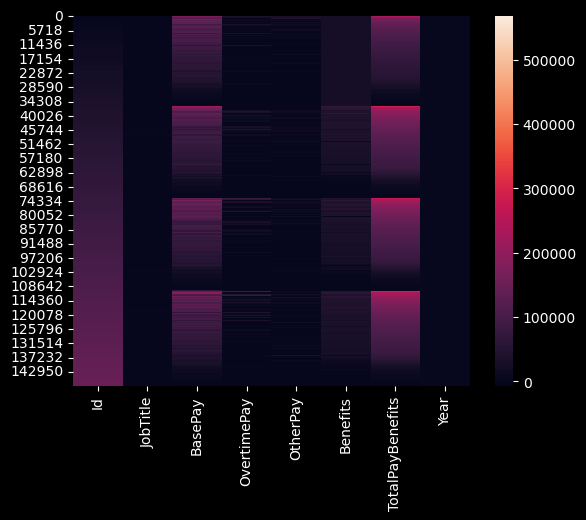

In [30]:
sns.heatmap(df_x)

In [31]:
df_x.nunique()

Id                  148654
JobTitle              2159
BasePay             109490
OvertimePay          65999
OtherPay             83226
Benefits             98466
TotalPayBenefits    142098
Year                     4
dtype: int64

In [32]:
x = np.array(df_x)
x

array([[ 1.00000000e+00,  8.31000000e+02,  1.67411180e+05, ...,
         2.50078932e+04,  5.67595430e+05,  2.01100000e+03],
       [ 2.00000000e+00,  2.93000000e+02,  1.55966020e+05, ...,
         2.50078932e+04,  5.38909280e+05,  2.01100000e+03],
       [ 3.00000000e+00,  2.93000000e+02,  2.12739130e+05, ...,
         2.50078932e+04,  3.35279910e+05,  2.01100000e+03],
       ...,
       [ 1.48652000e+05,  1.27400000e+03,  6.63254488e+04, ...,
         2.50078932e+04,  0.00000000e+00,  2.01400000e+03],
       [ 1.48653000e+05,  1.27400000e+03,  6.63254488e+04, ...,
         2.50078932e+04,  0.00000000e+00,  2.01400000e+03],
       [ 1.48654000e+05,  5.23000000e+02,  0.00000000e+00, ...,
         0.00000000e+00, -6.18130000e+02,  2.01400000e+03]])

In [33]:
Scaling = StandardScaler()
x[:,:] = Scaling.fit_transform(x[:,:])

In [34]:
x

array([[-1.73203916e+00, -7.25547177e-01,  2.36863410e+00, ...,
         5.43048097e-16,  7.54702663e+00, -1.36250299e+00],
       [-1.73201585e+00, -1.67230143e+00,  2.10045187e+00, ...,
         5.43048097e-16,  7.09019222e+00, -1.36250299e+00],
       [-1.73199255e+00, -1.67230143e+00,  3.43075559e+00, ...,
         5.43048097e-16,  3.84734151e+00, -1.36250299e+00],
       ...,
       [ 1.73199255e+00,  5.40292778e-02,  3.40979505e-16, ...,
         5.43048097e-16, -1.49207832e+00,  1.32197951e+00],
       [ 1.73201585e+00,  5.40292778e-02,  3.40979505e-16, ...,
         5.43048097e-16, -1.49207832e+00,  1.32197951e+00],
       [ 1.73203916e+00, -1.26755519e+00, -1.55413348e+00, ...,
        -1.86648817e+00, -1.50192220e+00,  1.32197951e+00]])

In [35]:
df_x = pd.DataFrame(x,columns=['Id','JobTitle','BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits','Year'])
df_x

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
0,-1.732039,-0.725547,2.368634e+00,-0.442289,4.921953e+01,5.430481e-16,7.547027,-1.362503
1,-1.732016,-1.672301,2.100452e+00,20.958781,1.665279e+01,5.430481e-16,7.090192,-1.362503
2,-1.731993,-1.672301,3.430756e+00,8.819667,1.589262e+00,5.430481e-16,3.847342,-1.362503
3,-1.731969,1.551590,2.715890e-01,4.457291,2.416173e+01,5.430481e-16,3.800580,-1.362503
4,-1.731946,-1.174288,1.595156e+00,0.407793,2.216677e+01,5.430481e-16,3.705500,-1.362503
...,...,...,...,...,...,...,...,...
148649,1.731946,-1.198924,-1.554133e+00,-0.442289,-4.528992e-01,-1.866488e+00,-1.492078,1.321980
148650,1.731969,0.054029,3.409795e-16,0.000000,5.644501e-17,5.430481e-16,-1.492078,1.321980
148651,1.731993,0.054029,3.409795e-16,0.000000,5.644501e-17,5.430481e-16,-1.492078,1.321980
148652,1.732016,0.054029,3.409795e-16,0.000000,5.644501e-17,5.430481e-16,-1.492078,1.321980


<Axes: >

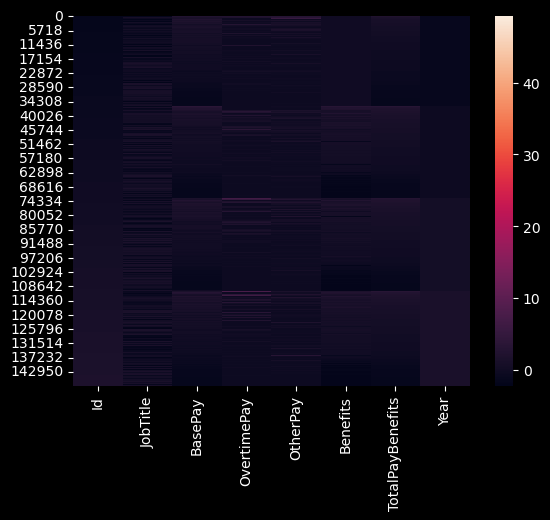

In [36]:
sns.heatmap(df_x)

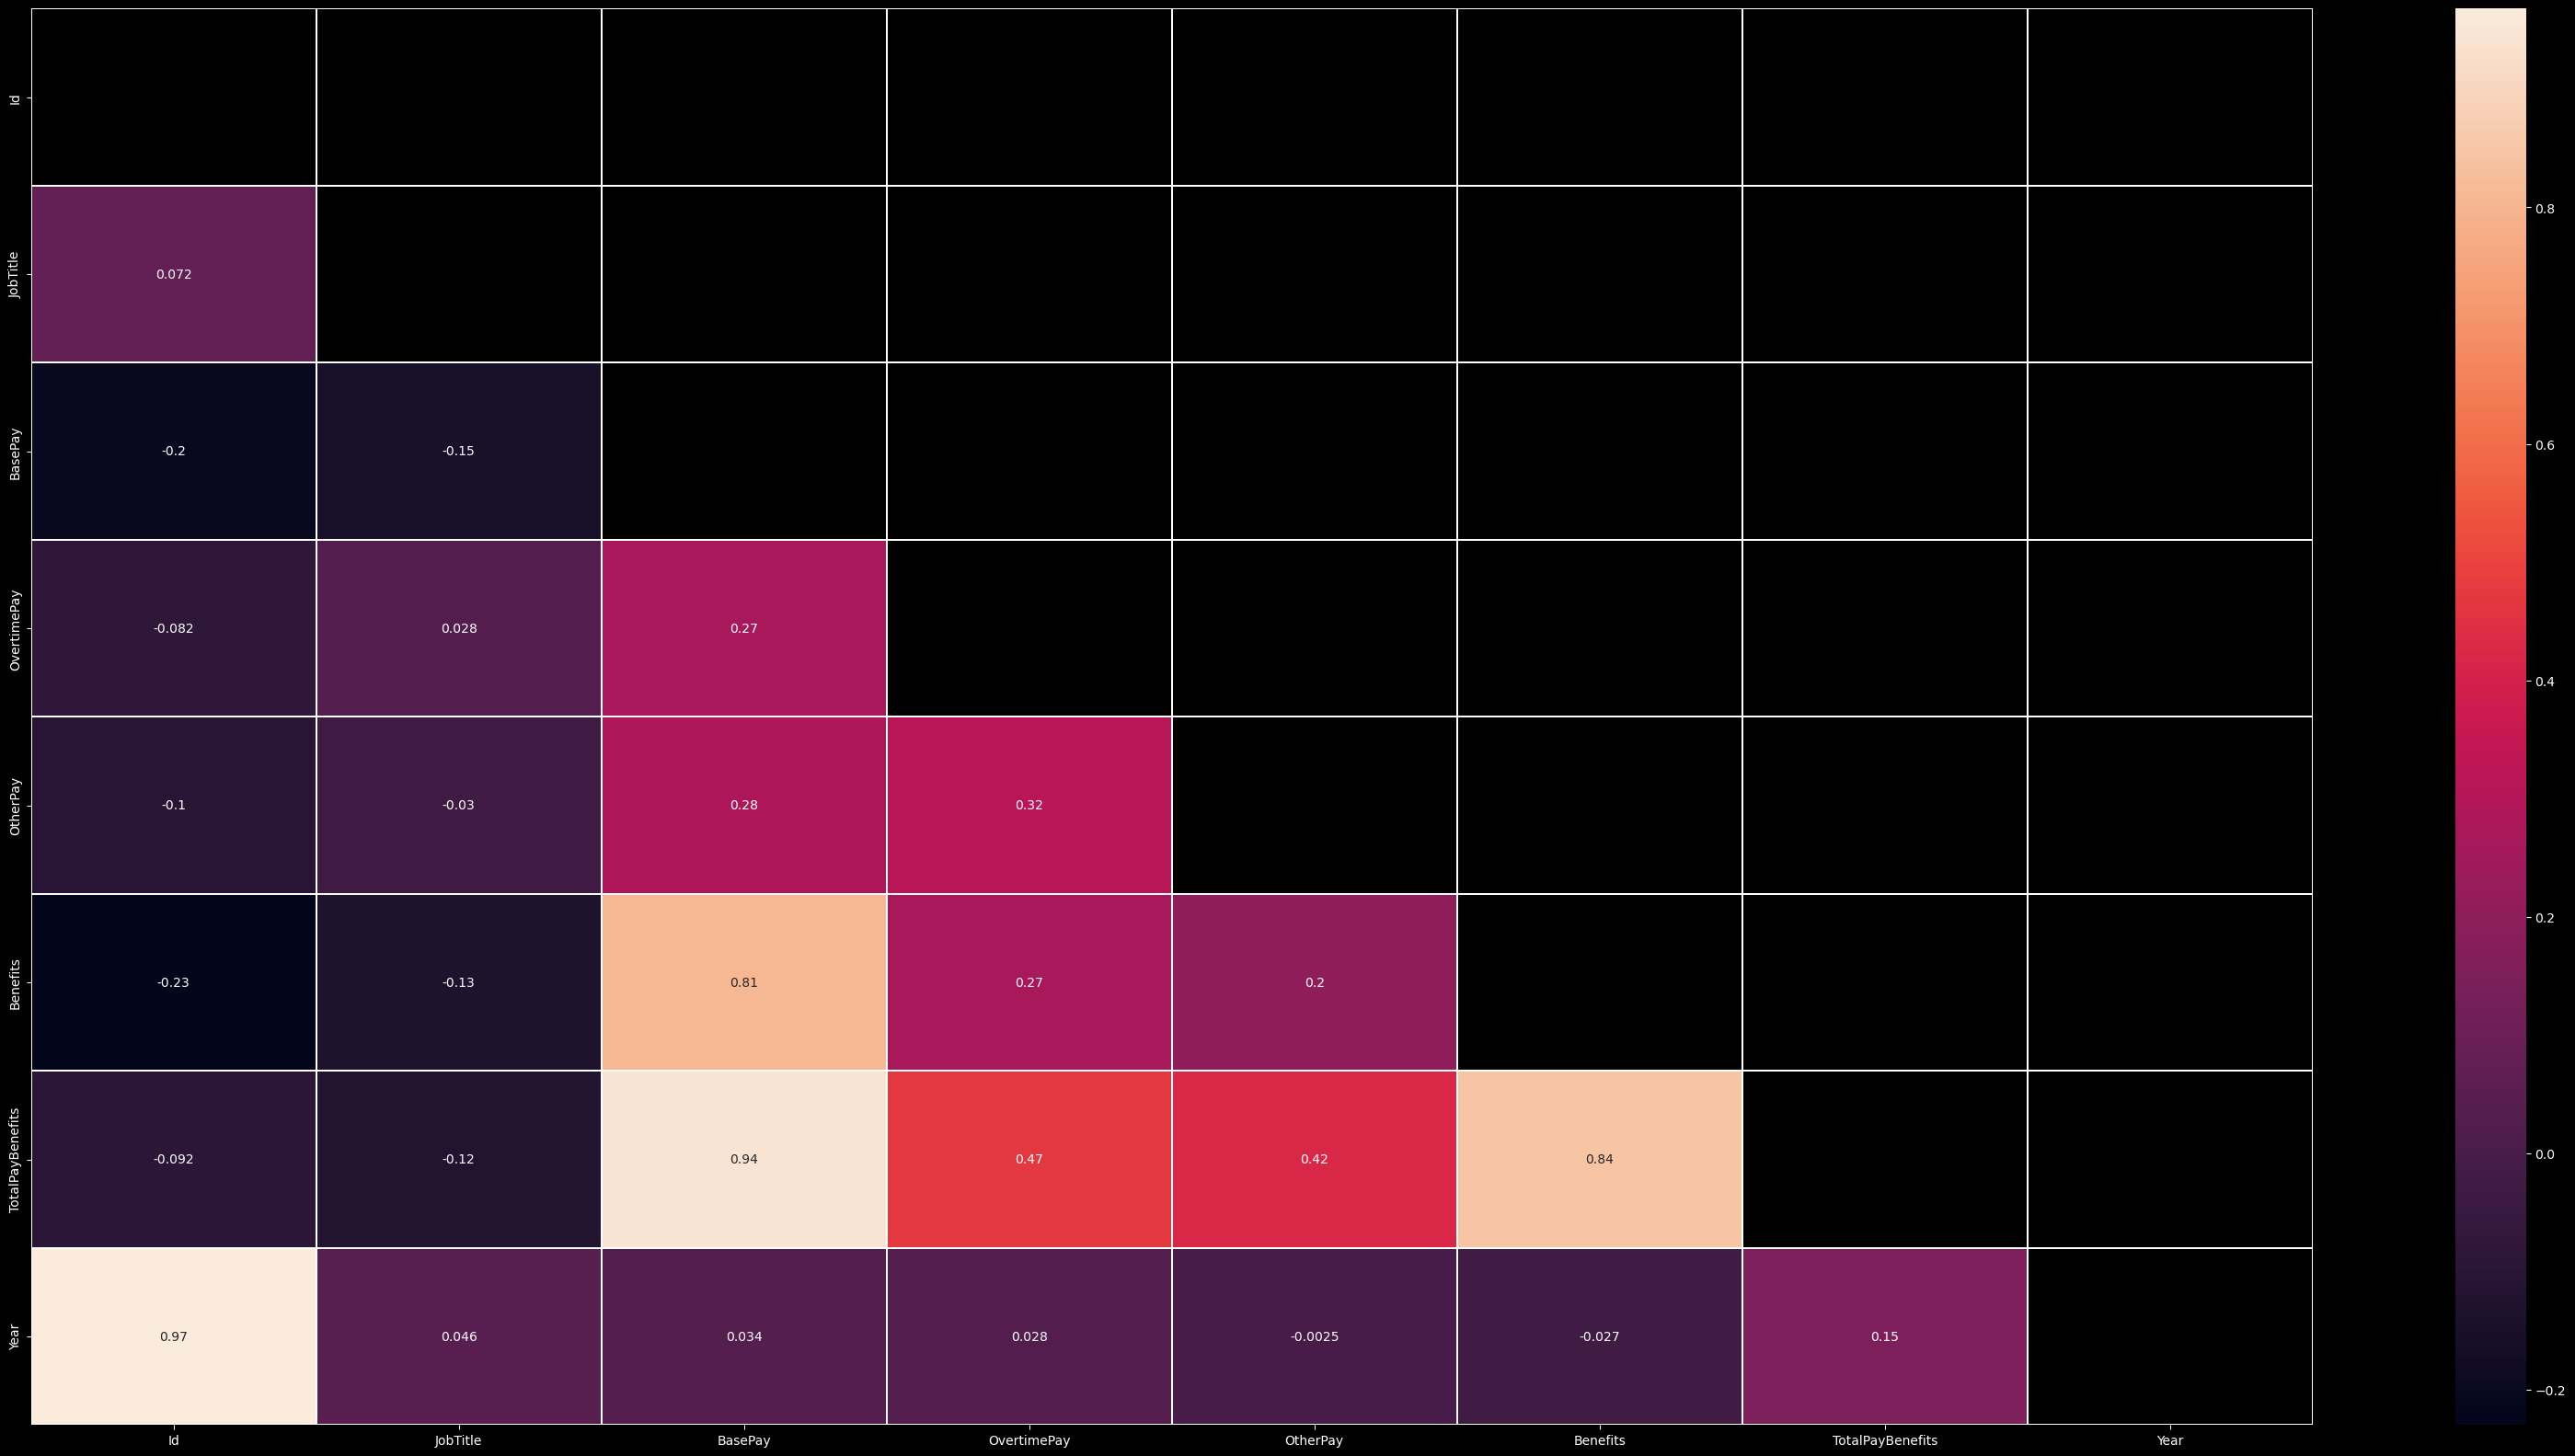

In [37]:
plt.figure(figsize=(40, 20))
matrix = np.triu(df_x.corr())
sns.heatmap(df_x.corr(), annot=True, linewidth=.10, mask=matrix);

<Axes: ylabel='Count'>

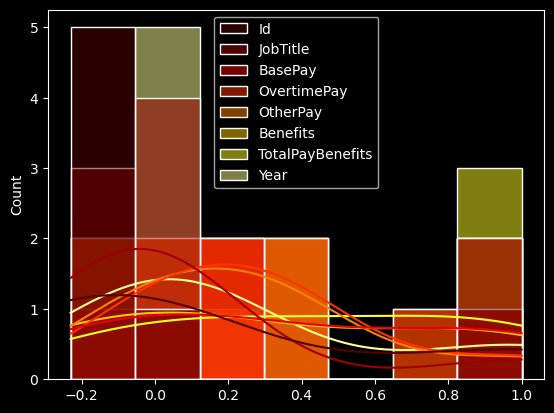

In [38]:
sns.histplot(data=df_x.corr(),kde=True,palette='hot')

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

# Linear Regression

In [40]:
LE = LinearRegression()
LE.fit(x_train,y_train)
y_pred = LE.predict(x_test)
print(y_pred)

[70147.54558661 55543.31904182 90273.14775365 ... 65272.02609274
 58460.91544336 42297.23553369]


In [41]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,71797.29,70147.545587
1,58110.25,55543.319042
2,91420.00,90273.147754
3,56086.96,58292.134865
4,16317.15,16669.248193
...,...,...
29726,62654.68,60968.592717
29727,148193.95,146747.959499
29728,62734.23,65272.026093
29729,60352.02,58460.915443


In [42]:
acc1 = r2_score(y_test,y_pred)*100
acc1

99.50463773652743

<Axes: title={'center': ' Actual & Predict '}>

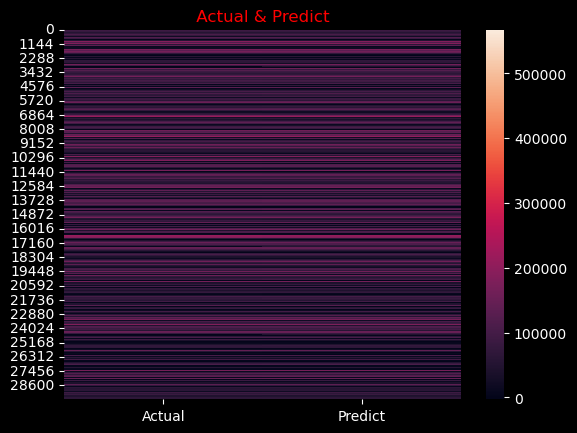

In [43]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x22c01564160>,
 [Text(-0.017117800596334866, -1.0998668014367667, 'Accuracy'),
  Text(0.017117802205350682, 1.099866801411725, 'Error')],
 [Text(-0.00933698214345538, -0.5999273462382364, '100%'),
  Text(0.009336983021100372, 0.5999273462245772, '0%')])

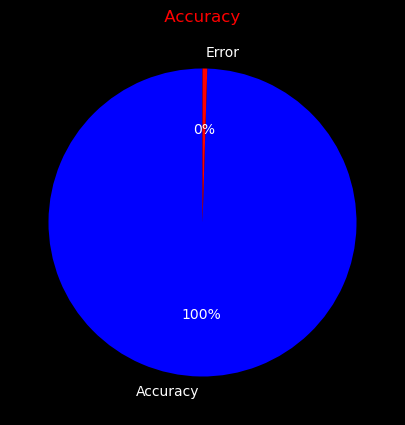

In [44]:
plt.figure(figsize=(10,5))
data = [acc1,100-acc1]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# Random Forest Regressor

In [45]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
y_pred2 = RFR.predict(x_test)
print(y_pred2)

[72134.0882 58164.7914 91424.557  ... 63268.8409 60352.0201 40330.1592]


In [46]:
df_comp2 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred2})
df_comp2

,Actual,Predict
0,71797.29,72134.0882
1,58110.25,58164.7914
2,91420.00,91424.5570
3,56086.96,56108.1614
4,16317.15,16378.5803
...,...,...
29726,62654.68,62624.2278
29727,148193.95,148249.8394
29728,62734.23,63268.8409
29729,60352.02,60352.0201


In [47]:
acc2 = r2_score(y_test,y_pred2)*100
acc2

99.94009691004587

([<matplotlib.patches.Wedge at 0x22c018fc370>,
 [Text(-0.002079355409466901, -1.099998034671463, 'Accuracy'),
  Text(0.002079556158042429, 1.0999980342919644, 'Error')],
 [Text(-0.0011341938597092187, -0.5999989280026162, '100%'),
  Text(0.001134303358932234, 0.5999989277956169, '0%')])

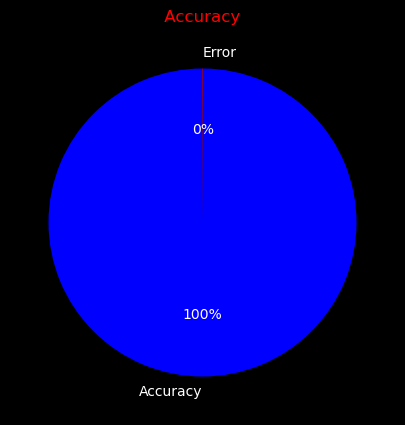

In [48]:
plt.figure(figsize=(10,5))
data = [acc1,100-acc2]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

In [49]:
pickle.dump(RFR, open('ShAI_BootCamp_Assignment.pkl', 'wb'))

In [50]:
pickled_model = pickle.load(open('ShAI_BootCamp_Assignment.pkl', 'rb'))

In [51]:
random_row = df_x.sample(n=1)
random_row

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
36409,-0.883596,-0.959596,1.418517,6.334813,1.517674,1.319985,2.697202,-0.467675


In [52]:
prediction = pickled_model.predict(random_row)
prediction

C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([220510.0333])

In [53]:
converter = pyttsx3.init()
converter.setProperty('rate', 120)
converter.setProperty('volume', 1)
converter.say(np.round(prediction))
converter.runAndWait()

# Good Luck!